In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
!pip install --quiet scvi-colab
from scvi_colab import install
install()

/home/mo/miniconda3/envs/ivelo/lib/python3.8/site-packages/scvi_colab/_core.py:41: UserWarning: 
                Not currently in Google Colab environment.

                Please run with `run_outside_colab=True` to override.

                Returning with no further action.
                
  warn(


In [3]:
import numpy as np
import pandas as pd
import scanpy as sc
import scvelo as scv
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#Choose dataset
dataset = "hindbrain"

#Choose model to train
model = "scvelo"

if dataset == "pbmc":
    cell_column = 'celltype'
elif dataset == "pancreas":
    cell_column = 'clusters'
elif dataset == "dentategyrus":
    cell_column = 'clusters'
elif dataset == "hindbrain":
    cell_column = 'Celltype'



In [5]:
if model =="hivelo":
    adata_file = "data/" + dataset + "/" + "processed_ontology.h5ad"
else:
    adata_file = "data/" + dataset + "/" + dataset + "_data_preprocessed.h5ad" #preprocessed data
adata_output = "data/" + dataset + "/" + model + "/" + "data_output.h5ad" #path so save output adata after training model
metrics_dict = "output/" + dataset + "/" + model + "/latent_analysis.pkl"



In [6]:
adata = sc.read(adata_file)

Velocity analysis

In [7]:
scv.tl.recover_dynamics(adata)
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata)

recovering dynamics (using 1/12 cores)


  0%|          | 0/1288 [00:00<?, ?gene/s]

    finished (0:17:45) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:09) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/12 cores)


  0%|          | 0/13501 [00:00<?, ?cells/s]

    finished (0:00:26) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [8]:
#calculate velocity confidence
scv.tl.velocity_confidence(adata)
vel_conf=adata.obs["velocity_confidence"]

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


In [9]:
vel_conf


E10_AAACCTGCAAGCTGAG    0.722703
E10_AAACCTGCAGACGCTC    0.670125
E10_AAACCTGCATCGATGT    0.706634
E10_AAACCTGCATGTCGAT    0.714089
E10_AAACCTGCATTTGCCC    0.704240
                          ...   
P14_TTGTAGGGTGCTGTAT    0.853194
P14_TTTATGCTCGGTTAAC    0.741717
P14_TTTGGTTAGCGTTTAC    0.737926
P14_TTTGGTTAGGGTTTCT    0.674811
P14_TTTGTCAGTGCCTGTG    0.750533
Name: velocity_confidence, Length: 13501, dtype: float64

computing velocity embedding
    finished (0:00:02) --> added
    'velocity_tsne', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_vel_embedding_hindbrainscvelo.png


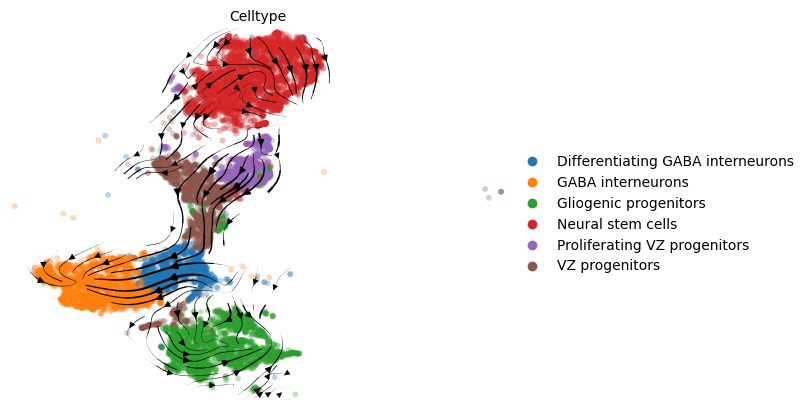

In [10]:
if dataset=="hindbrain":   
    scv.pl.velocity_embedding_stream(adata, basis='tsne', color=cell_column, legend_loc="right margin", save="vel_embedding_" + dataset + model + ".png")
else:
    scv.pl.velocity_embedding_stream(adata, basis='umap', color=cell_column, legend_loc="right margin", save="vel_embedding_" + dataset + model + ".png")

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


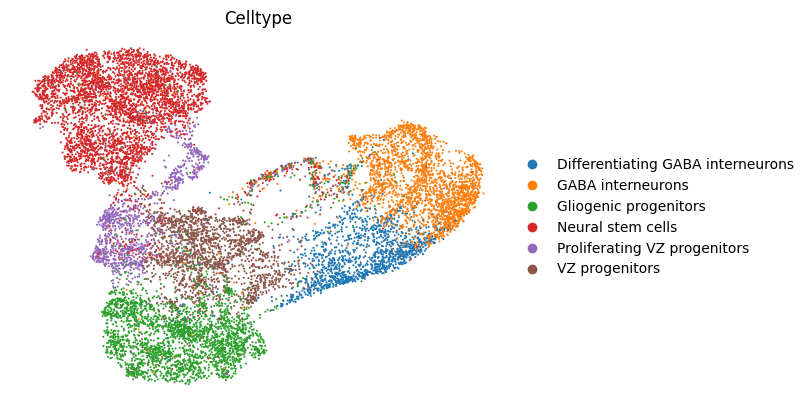

In [11]:
sc.tl.umap(adata)
sc.pp.neighbors(adata, use_rep="X_umap")
sc.pl.umap(adata, color=cell_column, frameon=False, save="_" + model + "_latent.png")

In [12]:
#make dictionary of metrics for plotting
import scib

scib.metrics.cluster_optimal_resolution(adata, cluster_key="cluster", label_key=cell_column)
metrics={}
metrics["mean_vel_conf"] = np.mean(adata.obs["velocity_confidence"])
metrics["vel_conf"] = adata.obs["velocity_confidence"]
metrics["adata"]=adata
metrics["nmi"] = scib.me.nmi(adata, group1="cluster", group2=cell_column)
metrics["ari"] = scib.me.ari(adata, group1="cluster", group2=cell_column)
metrics["asw"] = scib.me.silhouette(adata, group_key=cell_column, embed="X_umap")
metrics["clust_avg"] = (scib.metrics.nmi(adata, group1="cluster", group2=cell_column)+scib.me.ari(adata, group1="cluster", group2=cell_column)+scib.me.silhouette(adata, group_key=cell_column, embed="X_umap"))/3,
metrics["metrics_avg"] = (np.mean(adata.obs["velocity_confidence"])+scib.metrics.nmi(adata, group1="cluster", group2=cell_column)+scib.me.ari(adata, group1="cluster", group2=cell_column)+scib.me.silhouette(adata, group_key=cell_column, embed="X_umap"))/4

resolution: 0.1, nmi: 0.5815919576389668
resolution: 0.2, nmi: 0.5463298837070223
resolution: 0.3, nmi: 0.5227015563195339
resolution: 0.4, nmi: 0.5149210196362901
resolution: 0.5, nmi: 0.49811035704285217
resolution: 0.6, nmi: 0.4933235939337365
resolution: 0.7, nmi: 0.48235995729504644
resolution: 0.8, nmi: 0.48016174801707534
resolution: 0.9, nmi: 0.47493390885508746
resolution: 1.0, nmi: 0.4749842911921121
resolution: 1.1, nmi: 0.4730475474966773
resolution: 1.2, nmi: 0.4635219603976882
resolution: 1.3, nmi: 0.46161021081596754
resolution: 1.4, nmi: 0.4598102269794171
resolution: 1.5, nmi: 0.46058599551666796
resolution: 1.6, nmi: 0.45816666223184094
resolution: 1.7, nmi: 0.45435167623351336
resolution: 1.8, nmi: 0.4535322614145159
resolution: 1.9, nmi: 0.45219401418457966
resolution: 2.0, nmi: 0.44877558018742686
optimised clustering against Celltype
optimal cluster resolution: 0.1
optimal score: 0.5815919576389668


/tmp/ipykernel_21533/850131075.py:9: DeprecationWarning: Keyword argument 'group1' has been deprecated in favour of 'cluster_key'. 'group1' will be removed in a future version.
  metrics["nmi"] = scib.me.nmi(adata, group1="cluster", group2=cell_column)
/tmp/ipykernel_21533/850131075.py:9: DeprecationWarning: Keyword argument 'group2' has been deprecated in favour of 'label_key'. 'group2' will be removed in a future version.
  metrics["nmi"] = scib.me.nmi(adata, group1="cluster", group2=cell_column)
/tmp/ipykernel_21533/850131075.py:10: DeprecationWarning: Keyword argument 'group1' has been deprecated in favour of 'cluster_key'. 'group1' will be removed in a future version.
  metrics["ari"] = scib.me.ari(adata, group1="cluster", group2=cell_column)
/tmp/ipykernel_21533/850131075.py:10: DeprecationWarning: Keyword argument 'group2' has been deprecated in favour of 'label_key'. 'group2' will be removed in a future version.
  metrics["ari"] = scib.me.ari(adata, group1="cluster", group2=cel

In [13]:
#save dictionary to pkl
import pickle
with open(metrics_dict, 'wb') as f:
    pickle.dump(metrics, f)

In [16]:
metrics

{'mean_vel_conf': 0.7404296519896202,
 'vel_conf': E10_AAACCTGCAAGCTGAG    0.722703
 E10_AAACCTGCAGACGCTC    0.670125
 E10_AAACCTGCATCGATGT    0.706634
 E10_AAACCTGCATGTCGAT    0.714089
 E10_AAACCTGCATTTGCCC    0.704240
                           ...   
 P14_TTGTAGGGTGCTGTAT    0.853194
 P14_TTTATGCTCGGTTAAC    0.741717
 P14_TTTGGTTAGCGTTTAC    0.737926
 P14_TTTGGTTAGGGTTTCT    0.674811
 P14_TTTGTCAGTGCCTGTG    0.750533
 Name: velocity_confidence, Length: 13501, dtype: float64,
 'adata': AnnData object with n_obs × n_vars = 13501 × 1288
     obs: 'TotalUMIs', 'barcode', 'Celltype', 'Lineage', 'Timepoint', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'cluster', 'root_cells', 'end_points', 'velocity_pseudotime'
     var: 'Accession', 'AccessionVersion', 'Aliases', 'CcdsID', 'Chromosome', 'ChromosomeEnd', 'ChromosomeStart', 'CosmicID', 'DnaBindingDomain'

/tmp/ipykernel_21533/1921900761.py:2: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  adata.uns["neighbors"]["distances"] = adata.obsp["distances"]
/tmp/ipykernel_21533/1921900761.py:3: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns["neighbors"]["connectivities"] = adata.obsp["connectivities"]


running PAGA using priors: ['velocity_pseudotime']


/home/mo/miniconda3/envs/ivelo/lib/python3.8/site-packages/scvelo/tools/paga.py:150: RuntimeWarning: invalid value encountered in divide
  threshold = max(np.nanmin(np.nanmax(T / (T > 0), axis=0)) - 1e-6, 0.01)
/home/mo/miniconda3/envs/ivelo/lib/python3.8/site-packages/scvelo/tools/paga.py:150: RuntimeWarning: All-NaN slice encountered
  threshold = max(np.nanmin(np.nanmax(T / (T > 0), axis=0)) - 1e-6, 0.01)
/home/mo/miniconda3/envs/ivelo/lib/python3.8/site-packages/scvelo/tools/paga.py:176: RuntimeWarning: invalid value encountered in divide
  self.threshold = np.nanmin(np.nanmax(df.values / (df.values > 0), axis=0))
/home/mo/miniconda3/envs/ivelo/lib/python3.8/site-packages/scvelo/tools/paga.py:176: RuntimeWarning: All-NaN slice encountered
  self.threshold = np.nanmin(np.nanmax(df.values / (df.values > 0), axis=0))
/home/mo/miniconda3/envs/ivelo/lib/python3.8/site-packages/scvelo/plotting/utils.py:555: FutureWarning: Setting categories in-place is deprecated and will raise in a futu

    finished (0:00:02) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)
saving figure to file ./figures/scvelo_paga_hindbrainscvelo.png


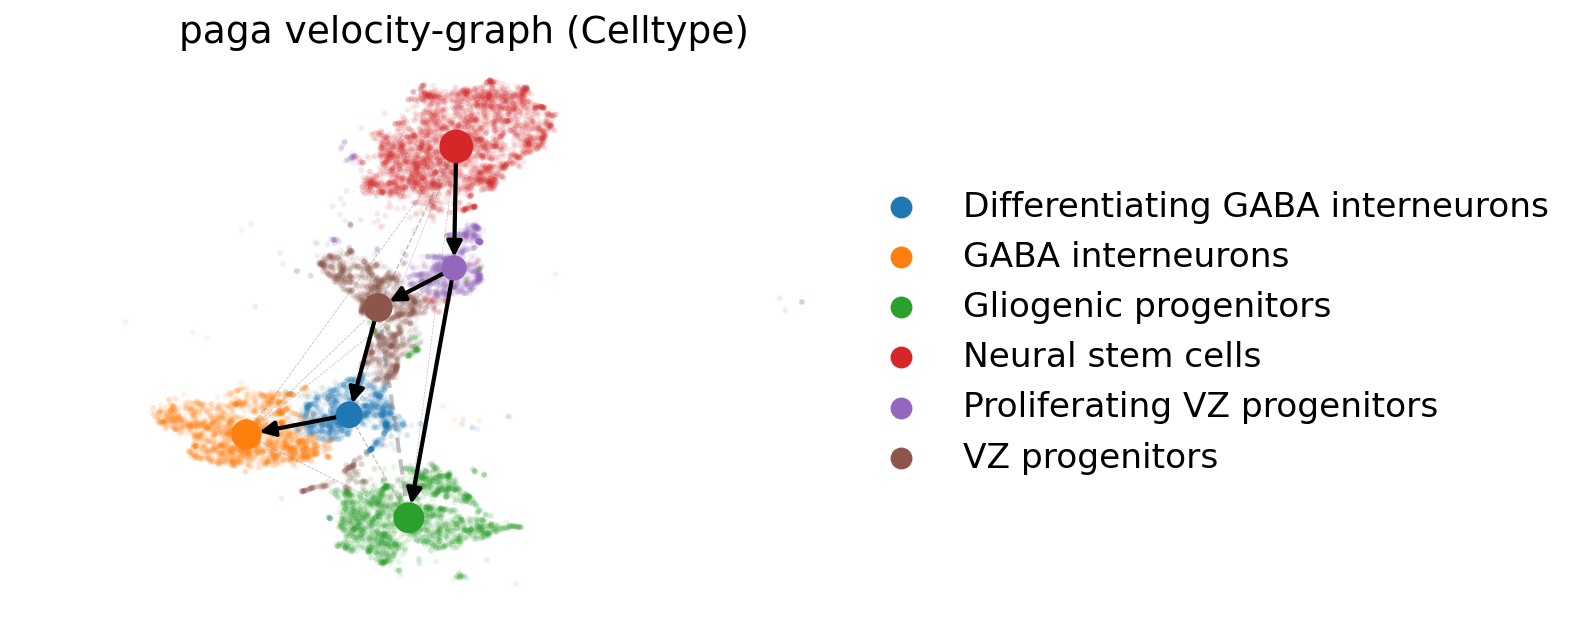

In [15]:
# trajectory inference
adata.uns["neighbors"]["distances"] = adata.obsp["distances"]
adata.uns["neighbors"]["connectivities"] = adata.obsp["connectivities"]
scv.tl.paga(adata, groups=cell_column)
scv.pl.paga(
    adata,
    basis="tsne",
    size=30,
    alpha=0.1,
    min_edge_width=2,
    node_size_scale=1,
    dpi=150,
    save="paga_" + dataset + model + ".png"
)